In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from folium import plugins
from folium.plugins import HeatMapWithTime
import folium
import geopandas as gpd
from folium.plugins import HeatMap
%matplotlib inline

In [131]:
weather = pd.read_csv('kalamazoo_weather.csv')


In [135]:
month=[]
day=[]
year=[]
weather['DATE'] =  pd.to_datetime(weather['DATE'])
month = weather['DATE'].dt.month
day= weather['DATE'].dt.day
year= weather['DATE'].dt.year  

In [136]:
weather['Day']=pd.Series(day)
weather['Month']=pd.Series(month)
weather['Year']=pd.Series(year)

In [119]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [137]:
weather.head()

,DATE,PRCP,T-MAX,T-MIN,T-AVG,Day,Month,Year
0,2009-01-01,0.00,29.0,15.0,22,1,1,2009
1,2009-01-02,0.00,30.0,16.0,23,2,1,2009
2,2009-01-03,0.00,33.0,14.0,23.5,3,1,2009
3,2009-01-04,0.03,36.0,24.0,30,4,1,2009
4,2009-01-05,0.00,29.0,17.0,23,5,1,2009


In [138]:
weather.tail()

,DATE,PRCP,T-MAX,T-MIN,T-AVG,Day,Month,Year
3996,2019-12-12,0.0,39.0,11.0,25,12,12,2019
3997,2019-12-13,0.0,42.0,30.0,36,13,12,2019
3998,2019-12-14,0.0,37.0,29.0,33,14,12,2019
3999,2019-12-15,0.0,31.0,25.0,28,15,12,2019
4000,2019-12-16,0.0,34.0,25.0,29.5,16,12,2019


In [139]:
#dataframe of days 28 or below
hard_frost = weather[weather['T-MIN']<=28]

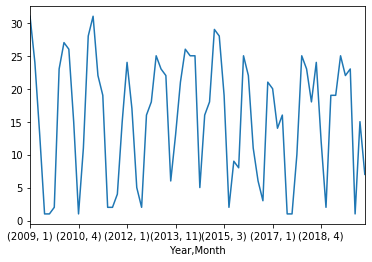

In [140]:
hard_frost.groupby(['Year','Month']).size().plot(kind='line');

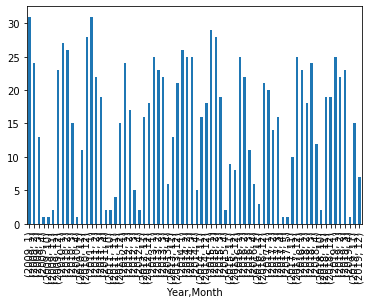

In [141]:
hard_frost.groupby(['Year','Month']).size().plot(kind='bar')

In [142]:
pd.DataFrame(hard_frost.groupby(['Year','Month']).size()).to_csv('hard_freeze_mich.csv')